In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools, os


dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:]

integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    f"underdamped_langevin_{integrator_type}",
    f"adjusted_hmc_{integrator_type}",
    f"adjusted_malt",
    f"adjusted_microcanonical_{integrator_type}", 
    f"unadjusted_microcanonical__{integrator_type}",
                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]


# Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
# models = [f"Rosenbrock_{D*2}" for D in Ds]


models = [f"Gaussian_{dim}" for dim in dims]



df_tuned = pd.concat([pd.read_csv(f"results/tuned/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)
# df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]


df = df[(df["statistic"] == 'square') | (df['statistic'] == 'x2') ]
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
df['Adjusted'] = df['Sampler'].apply({
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'underdamped_langevin_velocity_verlet': False,
    'adjusted_hmc_velocity_verlet': True,
    'adjusted_malt': True,
    'adjusted_microcanonical_velocity_verlet': True,
    'unadjusted_microcanonical__velocity_verlet':False,
    
}.get)
df['Sampler'] = df['Sampler'].apply({
    'underdamped_langevin_velocity_verlet': 'LMC',
    'adjusted_hmc_velocity_verlet': 'HMC',
    'adjusted_malt': 'LMC',
    'unadjusted_microcanonical__velocity_verlet':'MCLMC',
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': 'MCLMC',
    
}.get)
# df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
# df['Sampler'] = df['Sampler'].apply({
#     'unadjusted_microcanonical__velocity_verlet': 'unadjusted_microcanonical_velocity_verlet',
#     'adjusted_microcanonical_velocity_verlet': 'adjusted_microcanonical_velocity_verlet',
#     'underdamped_langevin_velocity_verlet': 'underdamped_langevin_velocity_verlet',
#     'adjusted_hmc_velocity_verlet': 'adjusted_hmc_velocity_verlet',
#     'adjusted_malt': 'adjusted_malt',
# }.get)
df['ESS'] = 100/df["num_grads_to_low_error"]
df[df['Integrator']=='velocity_verlet'];
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']


In [2]:
# dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:7]

integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    f"underdamped_langevin_{integrator_type}",
    f"adjusted_hmc_{integrator_type}",
    f"adjusted_malt",
    f"adjusted_microcanonical_{integrator_type}", 
    f"unadjusted_microcanonical__{integrator_type}",
    
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]

# grid_samplers = [
#     x
#     for xs in grid_samplers
#     for x in xs
# ]

# grid_samplers = [f'grid_search_unadjusted_lmc']

# print(grid_samplers)


Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
models = [f"Rosenbrock_{D*2}" for D in Ds]

df_rsbr_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

# df_rsbr_grid = pd.concat([pd.read_csv(f"results/grid_search/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(grid_samplers, models)], ignore_index=True)

df_rsbr = pd.concat([df_rsbr_tuned], ignore_index=True)


df_rsbr["dim"] = df_rsbr["Model"].str.extract(r"(\d+)").astype(int)

df_rsbr = df_rsbr[df_rsbr["max"] == False]
df_rsbr = df_rsbr[(df_rsbr["statistic"] == 'square') | (df_rsbr['statistic'] == 'x2') ]
# df_rsbr['Integrator'] = df_rsbr['Sampler'].apply(lambda x: x.split('_')[-1])
# df_rsbr['Sampler'] = df_rsbr['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df_rsbr['Adjusted'] = df_rsbr['Sampler'].apply({
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': True,
    'unadjusted_microcanonical__velocity_verlet':False,
    'underdamped_langevin_velocity_verlet': False,
    'adjusted_hmc_velocity_verlet': True,
    'adjusted_malt': True,
}.get)
df_rsbr['Sampler'] = df_rsbr['Sampler'].apply({
    'unadjusted_microcanonical__velocity_verlet':'MCLMC',
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': 'MCLMC',
    'underdamped_langevin_velocity_verlet': 'LMC',
    'adjusted_hmc_velocity_verlet': 'HMC',
    'adjusted_malt': 'LMC',
}.get)
df_rsbr['ESS'] = 100/df_rsbr["num_grads_to_low_error"]
# df_rsbr[df_rsbr['Integrator']=='velocity_verlet']
# df_rsbr=df_rsbr[df_rsbr["Sampler"]=='adjusted_microcanonical_velocity_verlet']

# df_rsbr


In [15]:
def plot_power_lines(ax, power):

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    log_x_range = np.log(xlims)
    initital_value = np.linspace(np.log(ylims[0])- power * (log_x_range[1] - log_x_range[0]), np.log(ylims[1]) , 20) if power > 0 else np.linspace(np.log(ylims[0]), np.log(ylims[1])- power * (log_x_range[1] - log_x_range[0]), 20)

    for log_y0 in initital_value:
        ax.plot(np.exp(log_x_range), np.exp(log_y0 + power * (log_x_range - log_x_range[0])), ls= ':', color='black', alpha=0.2)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

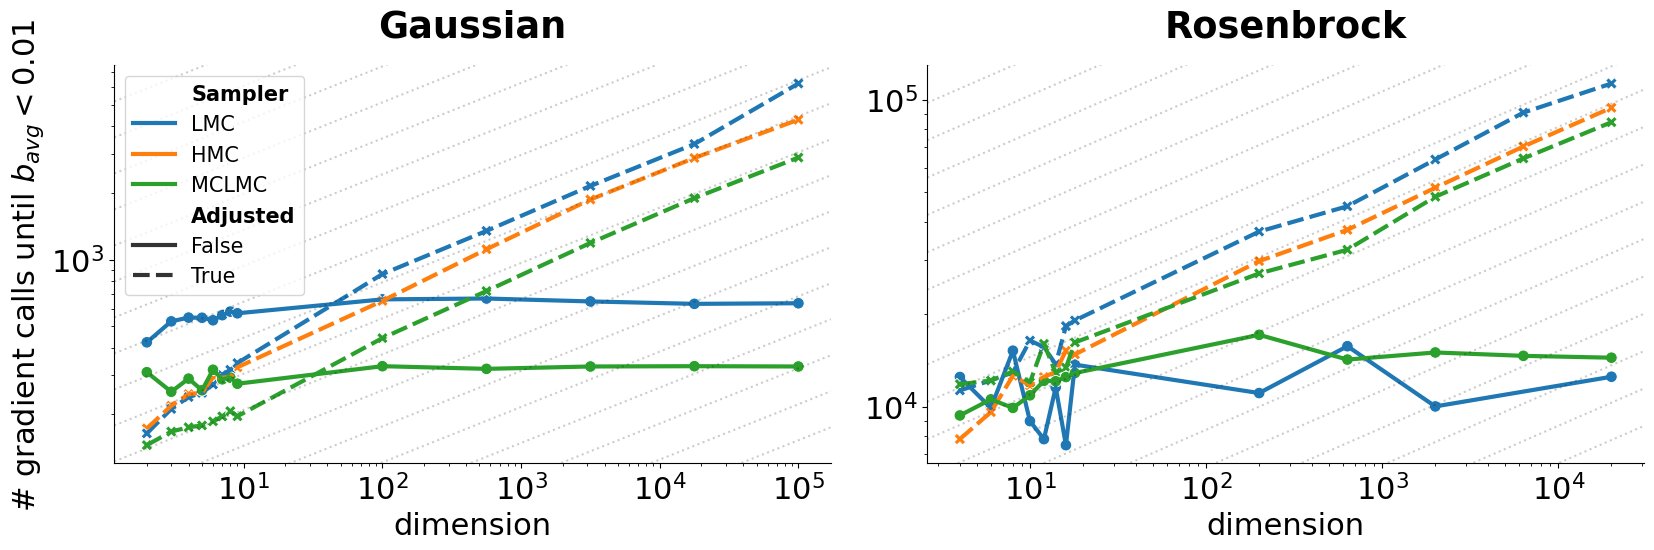

In [ ]:
ff = 22
plt.rcParams['xtick.labelsize'] = ff
plt.rcParams['ytick.labelsize'] = ff
plt.rcParams['font.size'] = ff


# figure with two subplots: on for gaussian (df) and one for rosenbrock (df_rsbr)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))
[ax.spines[['right', 'top']].set_visible(False) for ax in [ax1, ax2]] # remove top and right spines


sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax1, lw= 3)

sns.scatterplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax1, legend= None, s= 70)

ax1.set_xscale('log')
ax1.set_yscale('log')
plot_power_lines(ax1, 1/4)



ax1.set_ylabel('# gradient calls until $b_{avg} < 0.01$')
ax1.set_xlabel('dimension')
# title
ax1.set_title('Gaussian', y = 1.05, fontweight='bold')

# add legend
ax1.legend()
# bold the word Sampler in the legend
legend = ax1.legend(fontsize = 15)
for i, text in enumerate(legend.get_texts()):
    if i==4:text.set_weight('bold')
    if i==0:text.set_weight('bold')



sns.lineplot(data=df_rsbr, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax2, lw= 3)

sns.scatterplot(data=df_rsbr, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax2, legend= None, s = 70)

# no legend
ax2.legend().remove()
# remove y axis label
ax2.set_ylabel('')
ax2.set_xlabel('dimension')
# title
ax2.set_title('Rosenbrock', y = 1.05, fontweight='bold')


ax2.set_xscale('log')
ax2.set_yscale('log')

plot_power_lines(ax2, 1/4)

plt.tight_layout()
plt.savefig('scaling.pdf', dpi= 500)
plt.show()

In [ ]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))



sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(2,2.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Standard normal with Metropolis adjusted microcanonical sampler")

In [ ]:

# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))



sns.lineplot(data=df_rsbr, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', 
    ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls until $b_{avg} < 0.01$')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 20000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.0,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)

plt.legend()
# bold the word Sampler in the legend
legend = ax.legend()
for i, text in enumerate(legend.get_texts()):
    if i==4:text.set_weight('bold')
    if i==0:text.set_weight('bold')



plt.title("Rosenbrock: adjusted vs unadjusted")

# display all rows of df

# with pd.option_context('display.max_rows', None):
#     display(df)

In [13]:
import numpy as np
import itertools
import pandas as pd
import os 

Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]


integrator_types = ['velocity_verlet'
                    , 'mclachlan', 
                    'omelyan'
                    ]

samplers = [[
    
    f"adjusted_microcanonical_{integrator_type}", 
    # f"unadjusted_microcanonical__{integrator_type}",
    

                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#     f"grid_search_adjusted_microcanonical_{integrator_type}",
#     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]



models = [f"Rosenbrock_{D*2}" for D in Ds]



df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]
df = df[df["statistic"] == 'x2']
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df['ESS'] = 100/df["num_grads_to_low_error"]
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']





Text(0.5, 1.0, 'Product of 2D Rosenbrocks with Metropolis adjusted microcanonical sampler')

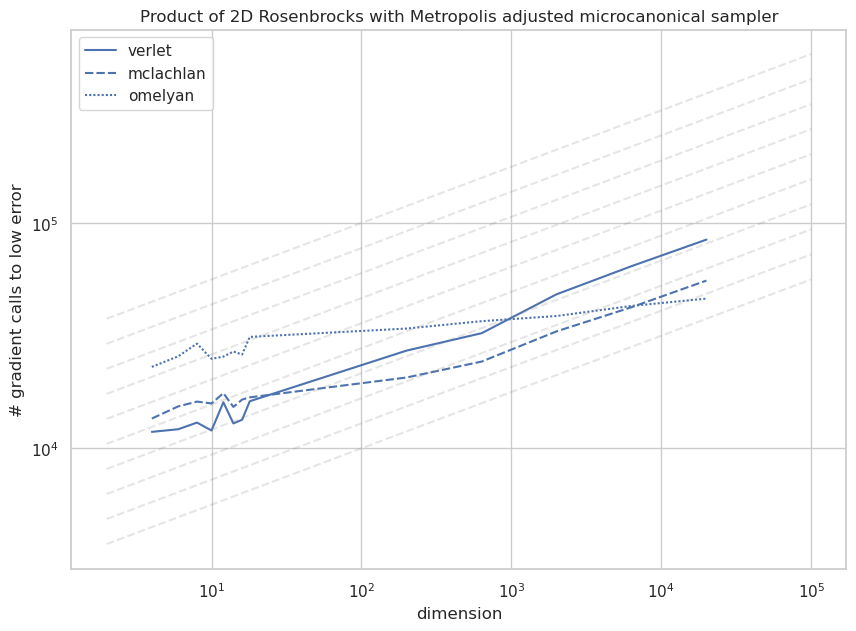

In [21]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    # hue='Sampler', 
    style='Integrator', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Product of 2D Rosenbrocks with Metropolis adjusted microcanonical sampler")

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import itertools, os

# # dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:7]


# integrator_types = [
#     # 'velocity_verlet',
#     'mclachlan'
#     # 'omelyan'
#     ]

# samplers = [[
    
#     # f"underdamped_langevin_{integrator_type}",
#     # f"adjusted_hmc_{integrator_type}",
#     # f"adjusted_malt",
#     f"adjusted_microcanonical_{integrator_type}", 
#     f"unadjusted_microcanonical__{integrator_type}",
    
#                 ] for integrator_type in integrator_types]

# samplers = [
#     x
#     for xs in samplers
#     for x in xs
# ]

# # grid_samplers = [
# #     [
# #         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# # #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# # #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
# #      ] for integrator_type in integrator_types]

# # grid_samplers = [
# #     x
# #     for xs in grid_samplers
# #     for x in xs
# # ]

# # grid_samplers = [f'grid_search_unadjusted_lmc']

# # print(grid_samplers)

# import os
# print(os.listdir("../../../results/other/Phi4/results"))

# Ds = [8, 16, 32, 64]
# # np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
# models = [f"Phi4_L{d}" for d in Ds]

# df_phi4_tuned = pd.concat([pd.read_csv(f"../../../results/other/Phi4/results/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

# # df_phi4_grid = pd.concat([pd.read_csv(f"results/grid_search/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(grid_samplers, models)], ignore_index=True)

# df_phi4 = pd.concat([df_phi4_tuned], ignore_index=True)


# df_phi4["dim"] = df_phi4["Model"].str.extract(r"(\d+)").astype(int)

# df_phi4 = df_phi4[df_phi4["max"] == False]
# df_phi4 = df_phi4[(df_phi4["statistic"] == 'square') | (df_phi4['statistic'] == 'x2') ]
# # df_phi4['Integrator'] = df_phi4['Sampler'].apply(lambda x: x.split('_')[-1])
# # df_phi4['Sampler'] = df_phi4['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
# df_phi4['Adjusted'] = df_phi4['Sampler'].apply({
#     # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
#     'adjusted_microcanonical_velocity_verlet': True,
#     'unadjusted_microcanonical__velocity_verlet':False,
#     'underdamped_langevin_velocity_verlet': False,
#     'adjusted_hmc_velocity_verlet': True,
#     'adjusted_malt': True,
# }.get)
# df_phi4['Sampler'] = df_phi4['Sampler'].apply({
#     'unadjusted_microcanonical__velocity_verlet':'MCLMC',
#     # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
#     'adjusted_microcanonical_velocity_verlet': 'MCLMC',
#     'underdamped_langevin_velocity_verlet': 'LMC',
#     'adjusted_hmc_velocity_verlet': 'HMC',
#     'adjusted_malt': 'LMC',
# }.get)
# df_phi4['ESS'] = 100/df_phi4["num_grads_to_low_error"]
# # df_phi4[df_phi4['Integrator']=='velocity_verlet']
# # df_phi4=df_phi4[df_phi4["Sampler"]=='adjusted_microcanonical_velocity_verlet']

# df_phi4


['adjusted_microcanonical_mclachlan_Phi4_L32_lam4.107.csv', 'adjusted_microcanonical_omelyan_Phi4_L32_lam4.297.csv', 'nuts_omelyan_Phi4_L16_lam6.242.csv', 'nuts_omelyan_Phi4_L8_lam7.475.csv', 'nuts_mclachlan_Phi4_L16_lam3.965.csv', 'adjusted_microcanonical_velocity_verlet_Phi4_L64_lam4.653.csv', 'unadjusted_microcanonical_omelyan_Phi4_L64_lam4.748.csv', 'nuts_Phi4_L8_lam6.716.csv', 'unadjusted_microcanonical_mclachlan_Phi4_L32_lam3.917.csv', 'nuts_Phi4_L32_lam4.107.csv', 'nuts_omelyan_Phi4_L8_lam3.680.csv', 'nuts_velocity_verlet_Phi4_L64_lam4.178.csv', 'adjusted_microcanonical_mclachlan_Phi4_L8_lam6.716.csv', 'unadjusted_microcanonical_mclachlan_Phi4_L32_lam4.866.csv', 'unadjusted_microcanonical_Phi4_L8_lam7.475.csv', 'adjusted_microcanonical_omelyan_Phi4_L16_lam6.242.csv', 'nuts_velocity_verlet_Phi4_L32_lam4.676.csv', 'unadjusted_microcanonical_omelyan_Phi4_L32_lam5.056.csv', 'nuts_mclachlan_Phi4_L16_lam5.483.csv', 'adjusted_microcanonical_mclachlan_Phi4_L64_lam4.558.csv', 'adjusted_m

FileNotFoundError: [Errno 2] No such file or directory: '../../../results/other/Phi4/results/adjusted_microcanonical_mclachlan_Phi4_L8.csv'